In [7]:
import random
from matplotlib import pyplot as plt

# https://qmplus.qmul.ac.uk/pluginfile.php/2665145/mod_resource/content/1/160355141_Habib_Wahab_MTH6138_IFS.pdf

In [8]:
#class for 2d affine transformation
class AffineTransformation:
    a: float
    b: float
    c: float
    d: float 
    e: float
    f: float
    
    def __init__(self, a, b, c, d, e, f):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.f = f
    
    def apply(self, x, y):
        new_x = self.a * x[-1] + self.b * y[-1] + self.e
        new_y = self.c * x[-1] + self.d * y[-1] + self.f
        x.append(new_x)
        y.append(new_y)

In [22]:
def generate_image(n, fns, probs, startPoint):

    #lists of x and y coords
    x, y = [], []

    x.append(startPoint[0])
    y.append(startPoint[1])

    # Randomly select functions to be applied using probabilities given
    transforms = random.choices(fns, probs, k=n)

    # Generate the transformed points
    for i in range(n):
        transforms[i].apply(x, y)
    
    return x, y


def show_image(name, num_iters, x, y):
    plt.scatter(x, y, s=100/num_iters)
    plt.title(f"{name} after {num_iters} iterations")  
    
    
def show_thousand_and_mil_iters(name, fns, probs, startPoint):
    n_thousand = 1000
    x_thousand, y_thousand = generate_image(n_thousand, fns, probs, startPoint)

    n_mil = 1000000
    x_mil, y_mil = generate_image(n_mil, fns, probs, startPoint)

    plt.subplots(1, 2, figsize=(9, 8))

    plt.subplot(2, 2, 1)
    show_image(name, n_thousand, x_thousand, y_thousand)

    plt.subplot(2, 2, 2)
    show_image(name, n_mil, x_mil, y_mil)

    plt.tight_layout()
    plt.show()

Drawing Barsley Fern using IFS

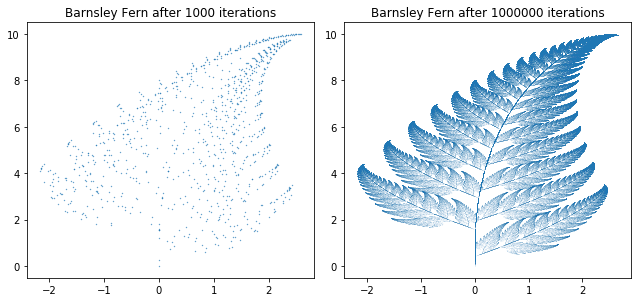

In [23]:
# Define transformations
#barnsley fern        
w1 = AffineTransformation(0, 0, 0, 0.16, 0, 0)
w2 = AffineTransformation(0.85, 0.04, -0.04, 0.85, 0, 1.6)
w3 = AffineTransformation(0.20, -0.26, 0.23, 0.22, 0, 1.6)
w4 = AffineTransformation(-0.15, 0.28, 0.26, 0.24, 0, 0.44)

fns = [w1, w2, w3, w4]
probs = [0.01, 0.85, 0.07, 0.07]

show_thousand_and_mil_iters("Barnsley Fern", fns, probs, (0,0))

Drawing Sierpinski Triangle using an IFS

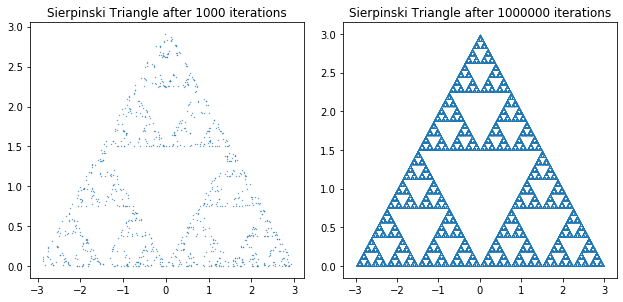

In [24]:
# Define transformations for sierpinski triangle
w1 = AffineTransformation(1/2, 0, 0, 1/2, -3/2, 0)
w2 = AffineTransformation(1/2, 0, 0, 1/2, 3/2, 0)
w3 = AffineTransformation(1/2, 0, 0, 1/2, 0, 3/2)

fns = [w1, w2, w3]
probs = [1/3, 1/3, 1/3]

show_thousand_and_mil_iters("Sierpinski Triangle", fns, probs, (0,0))